# Scatterplot

In [2]:
library(ggplot2)

In [3]:
piraten <- read.table("piraten.txt", header = TRUE)
head (piraten)

,pirat_in,geschlecht,alter,meer,schaetze,schiffe,gefahr,schwimmen,besitzer_in
,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,Kurt,m,32,Karibik,4,0,1,NA,nein
2,Sven,m,NA,Karibik,1,2,1,nein,nein
3,Sanna,w,35,Nordpazifik,4,3,1,ja,ja
4,Johnny,m,34,Nordpazifik,0,2,1,nein,nein
5,Annabell,w,39,Nordpazifik,1,2,1,nein,nein
6,Thoralf,m,44,Nordsee,8,2,1,NA,ja


## Scatterplot Zusammenhang Alter/versenkte Schiffe
#### Auf die "+" Zeichen achten, die die einzelnen Code-Bestandteile verbinden!

`geom_smooth()` using formula 'y ~ x'



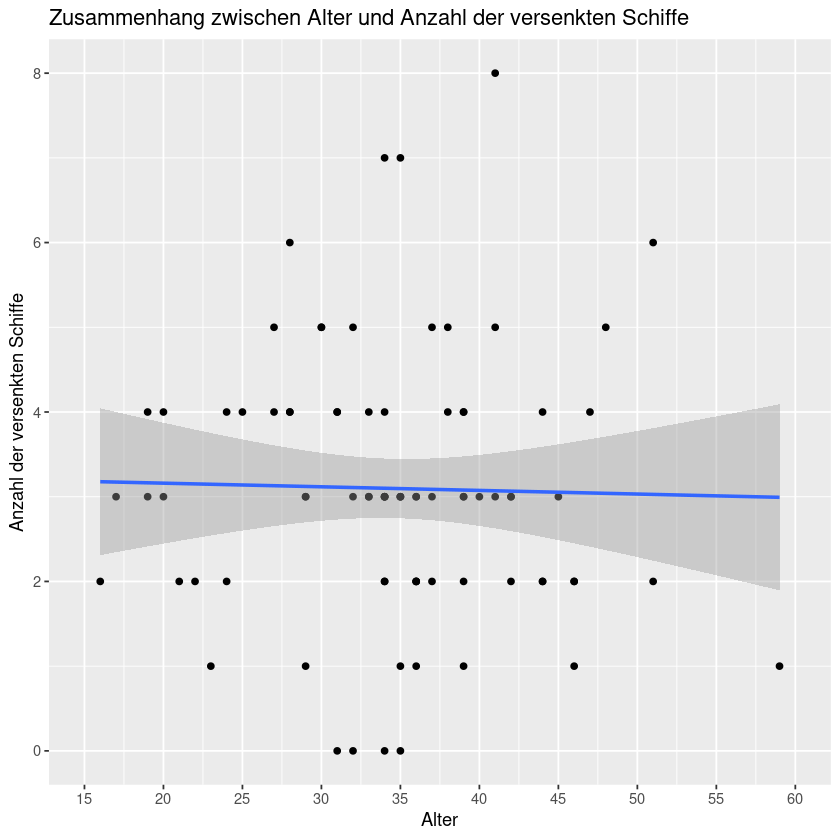

In [4]:
# 1. Grundlagenschicht aus Daten anlegen
scatter_alterschiffe <- ggplot(piraten, aes(x=alter, y=schiffe))

# 2. Grundlagenschicht aufrufen
scatter_alterschiffe +

# 3. Schicht: Art der Grafik: Scatterplot (geom_point) / Punkte
geom_point(na.rm = T) +

# 4. Schicht: Achsenlabels mit labs, scale_x_ und scale_y_
labs(x='Alter', y='Anzahl der versenkten Schiffe', 
     title = 'Zusammenhang zwischen Alter und Anzahl der versenkten Schiffe') +
scale_x_continuous(limits = c(15, 60),
                   breaks = seq(15, 60, by = 5)) + # Werte von 15 bis 60
scale_y_continuous(limits = c(0,8),
                   breaks = seq(0,8, by = 2)) + # 2-er Schritte

# 5. Schicht: Anpassungslinie/Regressionsgerade geom_smooth
# lm = linear model.
# OHNE Konfidenzintervall: geom_smooth(na.rm = T, method = 'lm', se = FALSE)
geom_smooth(na.rm = T, method = 'lm') 
    

## Gruppierter Scatterplot (nach Geschlechtern)

#### 1. Möglichkeit: Gruppierung nach Geschlecht in der Grundlagenschicht

`geom_smooth()` using formula 'y ~ x'



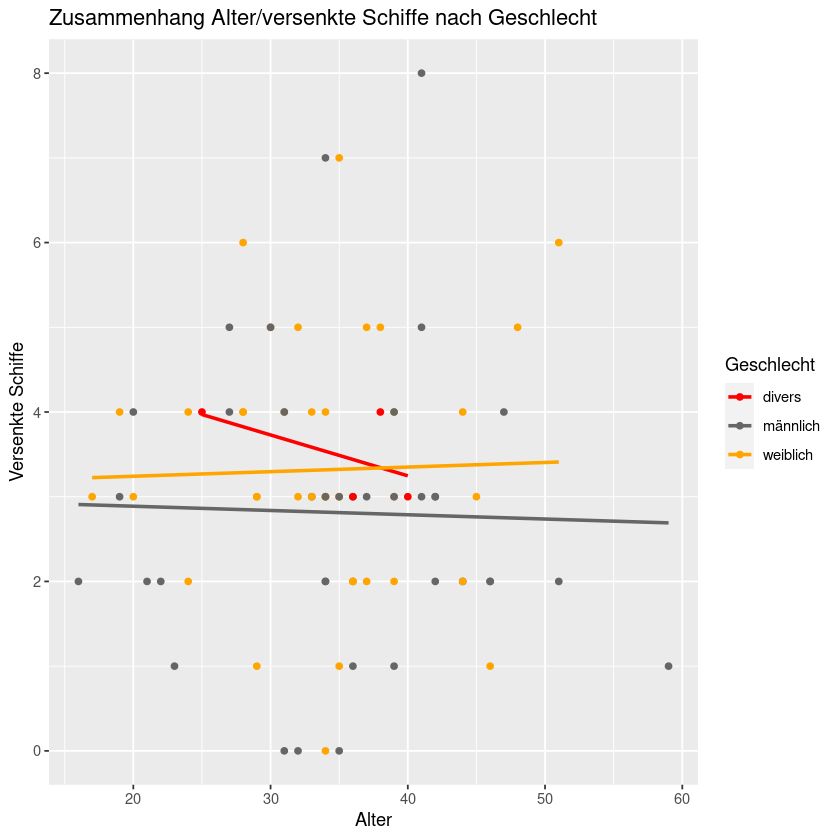

In [5]:
scatter_alterschiffe_geschlecht <- ggplot(piraten, aes(alter, schiffe, colour=geschlecht))

scatter_alterschiffe_geschlecht +

# Art der Grafik: Scatterplot (geom_point)
geom_point(na.rm = T) +

# Achsenbeschriftung und Titel
labs(x='Alter',
     y='Versenkte Schiffe',
     title = 'Zusammenhang Alter/versenkte Schiffe nach Geschlecht') +

# Legende manuell formatieren: Farben, Legendentitel, Kategorien, Bezeichnung
scale_colour_manual(values = c('red', 'grey40', 'orange1'),
                    name = 'Geschlecht',
                    breaks = c('d', 'm', 'w'),
                    labels = c('divers', 'männlich', 'weiblich')) +

# Anpassungslinie einfügen
# manuelle Unterscheidung nach Geschlecht nicht mehr nötig, 
# da bereits in Grundlagenschicht geschehen !
geom_smooth(na.rm = T,
            method = 'lm',
            se = FALSE) # se=FALSE ohne Konfidenzintervall 

#### 2. Möglichkeit: Gruppierung in der Punkteschicht (geom_point(aes(colour=geschlecht)))

`geom_smooth()` using formula 'y ~ x'



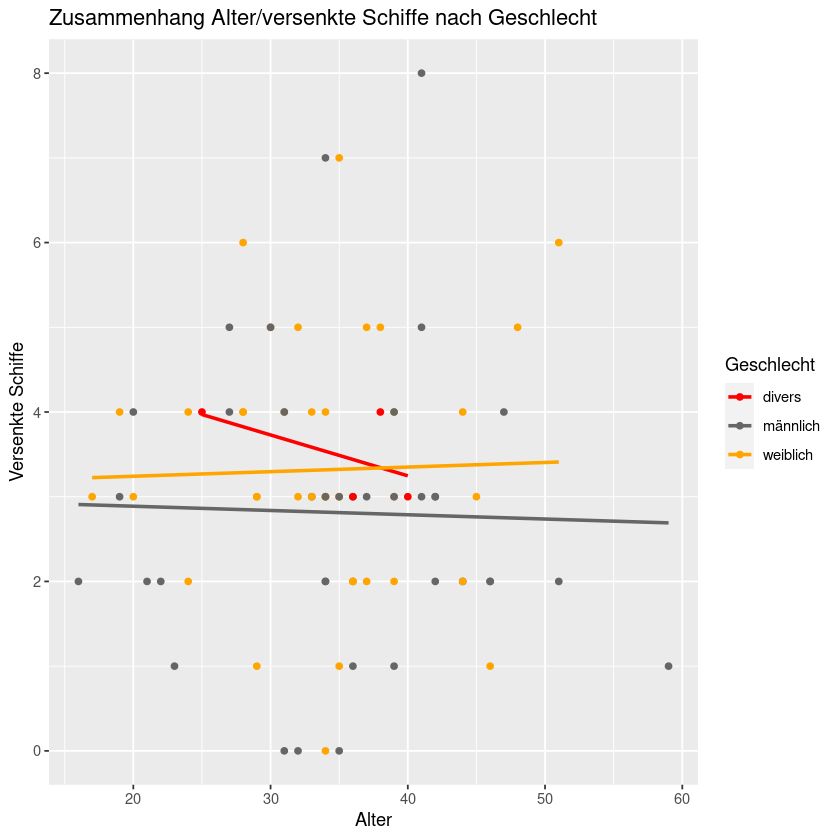

In [6]:
# Grundlagenschicht OHNE Unterscheidung nach Geschlecht
scatter_alterschiffe_geschlecht <- ggplot(piraten, aes(alter, schiffe))

scatter_alterschiffe_geschlecht +

# Unterscheidung nach Geschlecht in geom_point ! 
geom_point(na.rm = T, aes(colour=geschlecht)) +

# Achsenbeschriftung und Titel
labs(x='Alter', 
     y='Versenkte Schiffe', 
     title = 'Zusammenhang Alter/versenkte Schiffe nach Geschlecht') +

# Legende manuell formatieren: Farben, Legendentitel, Kategorien, Bezeichnung
scale_colour_manual(values = c('red', 'grey40', 'orange1'),
                    name = 'Geschlecht',
                    breaks = c('d', 'm', 'w'),
                    labels = c('divers', 'männlich', 'weiblich')) +

# Anpassungslinie einfügen (auch hier Unterscheidung nach Geschlecht manuell nötig !)
geom_smooth(na.rm = T,
            method = 'lm',
            se = FALSE, # se=FALSE ohne Konfidenzintervall 
            aes(color=geschlecht)) # Regressionslinen nach Geschlechtern